In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from datetime import datetime
import random


In [252]:
# Importing the dataset
df = pd.read_csv("U.S. Presidents Birth and Death Information - Sheet1.csv", sep=',', header=0)

# Making a copy to save original dataset in case of further use and splciing last tuple which is the "Reference"
df_copy = df[:-1]

In [ ]:
# Removing NaN values from DEATH DATE and filling with current date time with YYYY-MM-DD Formatting
currDate = datetime.now().strftime("%b %d, %Y")
df_copy["DEATH DATE"] = df["DEATH DATE"].fillna(currDate)

# Filling NaN values in LOCATION of DEATH with Alive
df_copy["LOCATION OF DEATH"] = df["LOCATION OF DEATH"].fillna("Alive")

# Converting dataframe's Date columns to standard datetime format
df_copy["BIRTH DATE"] = pd.to_datetime(df_copy["BIRTH DATE"])
df_copy["DEATH DATE"] = pd.to_datetime(df_copy["DEATH DATE"])

# Extracting year from BIRTH DATE
df_copy["year_of_birth"] = df_copy["BIRTH DATE"].dt.year.astype(int)

In [ ]:
# Calculating the required columns
df_copy["lived_years"] = (df_copy["DEATH DATE"] - df_copy["BIRTH DATE"])/np.timedelta64(1, 'Y')
df_copy["lived_months"] = (df_copy["DEATH DATE"] - df_copy["BIRTH DATE"])/np.timedelta64(1, 'M')
df_copy["lived_days"] = (df_copy["DEATH DATE"] - df_copy["BIRTH DATE"])/np.timedelta64(1, 'D')
df_copy["age"] = df_copy["lived_years"].astype(int)

In [255]:
# Sorting values based on days lived till now
longest_to_shortest_top10 = df_copy.sort_values(by=['lived_days'], ascending=False).head(10)
shortest_to_longest_top10 = df_copy.sort_values(by=['lived_days']).head(10)

# Revert the NaN subsitution
longest_to_shortest_top10["DEATH DATE"] = longest_to_shortest_top10["DEATH DATE"].replace(currDate, np.nan)
shortest_to_longest_top10["DEATH DATE"] = shortest_to_longest_top10["DEATH DATE"].replace(currDate, np.nan)


In [256]:
longest_to_shortest_top10

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth,lived_years,lived_months,lived_days,age
37,Jimmy Carter,1924-10-01,"Plains, Georgia",NaT,Alive,1924,98.071829,1176.861948,35820.0,98
39,George Bush,1924-06-12,"Milton, Mass.",2018-11-30,"Houston, Texas",1924,94.468743,1133.624920,34504.0,94
36,Gerald Ford,1913-07-14,"Omaha, Nebraska",2006-12-26,"Rancho Mirage, Cal.",1913,93.452980,1121.435758,34133.0,93
38,Ronald Reagan,1911-02-06,"Tampico, Illinois",2004-06-05,"Los Angeles, Cal.",1911,93.329774,1119.957289,34088.0,93
1,John Adams,1735-10-30,"Quincy, Mass.",1826-07-04,"Quincy, Mass.",1735,90.676742,1088.120906,33119.0,90
29,Herbert Hoover,1874-08-10,"West Branch, Iowa",1964-10-20,"New York, New York",1874,90.194871,1082.338446,32943.0,90
31,Harry S. Truman,1884-05-08,"Lamar, Missouri",1972-12-26,"Kansas City, Missouri",1884,88.634264,1063.611162,32373.0,88
3,James Madison,1751-03-16,"Port Conway, Va.",1836-06-28,"Orange Co., Va.",1751,85.285803,1023.429639,31150.0,85
2,Thomas Jefferson,1743-04-13,"Albemarle Co., Va.",1826-07-04,"Albemarle Co., Va.",1743,83.224159,998.689911,30397.0,83
35,Richard Nixon,1913-01-09,"Yorba Linda, Cal.",1994-04-22,"New York, New York",1913,81.282983,975.395799,29688.0,81


In [257]:
shortest_to_longest_top10

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth,lived_years,lived_months,lived_days,age
33,John F. Kennedy,1917-05-29,"Brookline, Mass.",1963-11-22,"Dallas, Texas",1917,46.484185,557.810222,16978.0,46
19,James A. Garfield,1831-11-19,"Cuyahoga Co., Ohio",1881-09-19,"Elberon, New Jersey",1831,49.835383,598.024600,18202.0,49
10,James K. Polk,1795-11-02,"Mecklenburg Co., N.C.",1849-06-15,"Nashville, Tennessee",1795,53.616433,643.397195,19583.0,53
15,Abraham Lincoln,1809-02-12,"LaRue Co., Kentucky",1865-04-15,"Washington, D.C.",1809,56.170900,674.050802,20516.0,56
20,Chester Arthur,1829-10-05,"Fairfield, Vermont",1886-11-18,"New York, New York",1829,57.120954,685.451447,20863.0,57
27,Warren G. Harding,1865-11-02,"Morrow County, Ohio",1923-08-02,"San Francisco, Cal.",1865,57.745197,692.942360,21091.0,57
23,William McKinley,1843-01-29,"Niles, Ohio",1901-09-14,"Buffalo, New York",1843,58.624065,703.488778,21412.0,58
24,Theodore Roosevelt,1858-10-27,"New York, New York",1919-01-06,"Oyster Bay, New York",1858,60.192886,722.314627,21985.0,60
28,Calvin Coolidge,1872-07-04,"Plymouth, Vermont",1933-01-05,"Northampton, Mass.",1872,60.505007,726.060083,22099.0,60
42,Barack Obama,1961-08-04,"Honolulu, Hawaii",NaT,Alive,1961,61.230552,734.766628,22364.0,61


In [258]:
# Extract lived days from data frame
lived_days_data = df_copy["lived_days"]

# To keep track of weighted values
values_with_weight = []

# To keep track of weights for weighted mean
weight_values_indexed = []

# Assigning random weights between 0,1 and calculate the weighted values
for i in range(len(lived_days_data)):
    randNum = random.uniform(0,1)
    values_with_weight.append(lived_days_data[i] * randNum)
    weight_values_indexed.append(randNum)
    
    
# All the statistics
mean = lived_days_data.mean()
weighted_mean = sum(values_with_weight)/sum(weight_values_indexed)
median = lived_days_data.median()

# Used "lived_years" for calculating mode as no two presidents have exactly lived the same number of days
lived_years_data = df_copy["lived_years"].astype(int)
mode = lived_years_data.mode()[0] 

max = lived_days_data.max()
min = lived_days_data.min()
std_dev = lived_days_data.std()

# Create new data frame for visulazing the statistical measures
stats_data = [ ['Mean', mean, mean/365],  ['Weighted_Mean', weighted_mean, weighted_mean/365], ['Median', median, median/365], ['Mode', mode*365, mode], ['Max', max, max/365], ['Min', min, min/365], ['Standard_Deviation', std_dev, std_dev/365] ]
stats_df = pd.DataFrame(stats_data, columns=['Age Statistic', 'in Days', 'in Years'])
stats_df

,Age Statistic,in Days,in Years
0,Mean,26416.977778,72.375282
1,Weighted_Mean,26909.686206,73.725168
2,Median,26227.000000,71.854795
3,Mode,24455.000000,67.000000
4,Max,35820.000000,98.136986
5,Min,16978.000000,46.515068
6,Standard_Deviation,4586.423039,12.565543


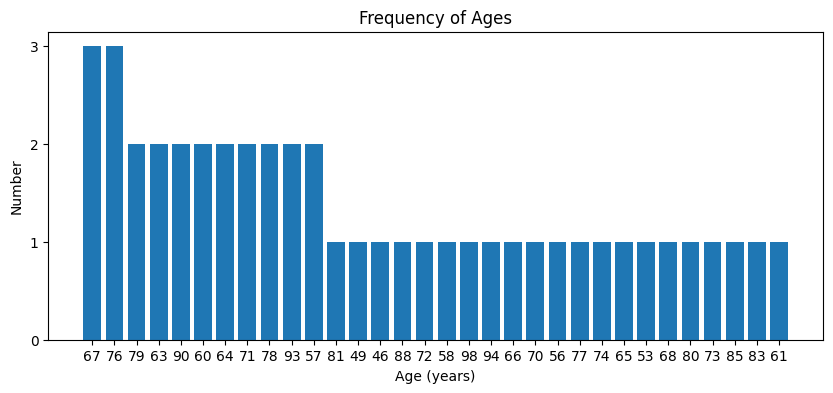

In [259]:
# Frequency Distribution plot to verify the mode. 
value_counts = lived_years_data.value_counts()

xCoords = []
for i in range(len(value_counts)):
    xCoords.append(i)
    
plot.figure(figsize=(10, 4))
plot.bar(xCoords, value_counts)
plot.xlabel("Age (years)")
plot.ylabel("Number")
plot.title("Frequency of Ages")

plot.xticks(xCoords, value_counts.keys())
plot.yticks(range(value_counts.max() + 1))
plot.show()

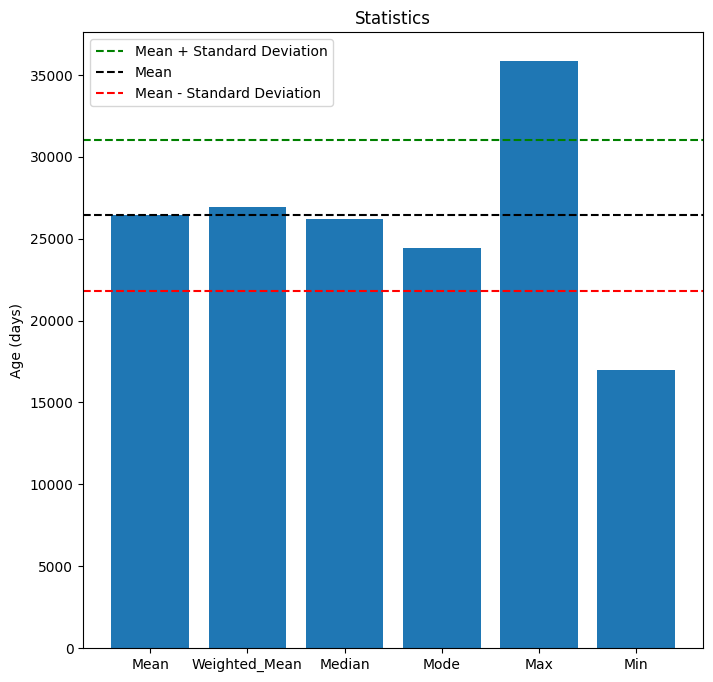

In [260]:
# Plotting the statistics
xlabel = stats_df["Age Statistic"]
xlabel = xlabel[:-1].to_list()
xCoords = range(len(xlabel))

yCoords = stats_df["in Days"] # For Years: stats_df["in Years"]
yCoords = yCoords[:-1].to_list()


plot.figure(figsize=(8, 8))
plot.bar(xCoords, yCoords)
plot.ylabel("Age (days)")
plot.title("Statistics")

plot.axhline(y = mean + std_dev, color='green', linestyle='--', label="Mean + SD") # For Years: (mean + std_dev)/365
plot.axhline(y = mean, color='black', linestyle='--', label="Mean") # For years: mean/365
plot.axhline(y = mean - std_dev, color='red', linestyle='--', label="Mean - SD") # For years: (mean - std_dev)/365
plot.xticks(xCoords, xlabel)
plot.legend(labels=['Mean + Standard Deviation', 'Mean', 'Mean - Standard Deviation'])
plot.show()